# Evolving Niches with Noise
## Publication Images

In [2]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -numpy
%aimport -logging
%aimport -os

import visualize.dataframe
# plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

In [3]:
directory_base = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/'
directories = ['20D17_nonoise_300x50', '20D17_g0_c012_i1_300x50',
               '20D22_g300_c012_i1_600x50', '20D23_g300_c012_i1_600x50_b25', '20D23_g300_c012_i1_600x50']
base_runs = [None, None, 104, 125, 105]
experiment_names = ['1','2','3a','3b','3c']

species = [pd.read_parquet(os.path.join(directory_base, d, 'species.parquet')) for d in directories]
individuals = [pd.read_parquet(os.path.join(directory_base, d, 'species.parquet')) for d in directories[:2]]
# spectra = [pd.read_parquet(os.path.join(directory_base, d, 'encoded_spectrum.parquet')) for d in directories]

# spectra_ob_fitness = []
# for i, (spectrum, specy) in enumerate(zip(spectra,species)):
#     gens = range(289,299)
#     if i >= 2:
#         gens = range(589,599)
#     last_10_species = specific_generation_over_runs(gens, data=specy)
#     run_role_fitness = last_10_species.groupby(['run','role'])['fitness'].mean()
#     run_fitness = run_role_fitness.groupby('run').mean()
#
#     sof = spectrum.join(run_fitness).sort_values(['fitness','generation'], ascending=[False, True])
#     sof = sof.drop(columns='fitness')
#     spectra_ob_fitness.append(sof)

idx = pd.IndexSlice

## Constant Noise Fitness
NOT USED

In [4]:
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10.5,3), sharex=True, sharey=True)
# plt.sca(ax1)
# for experiment, specy in zip(experiment_names[:2], species[:2]):
#     visualize.dataframe.plot_species_fitness(specy, species=0, role='sender', only_mean=True,
#                                              view=False, filename=None, close=False, label=experiment)
#
# # fig = plt.figure(figsize=(10.5,5))
# plt.sca(ax2)
# for experiment, specy in zip(experiment_names[:2], species[:2]):
#     visualize.dataframe.plot_species_fitness(specy, species=0, role='receiver', only_mean=True,
#                                              view=False, filename=None, close=False, label=experiment)
#
# plt.legend()
# plt.savefig('constant_noise_fitness.svg')
# plt.show()
# !cairosvg constant_noise_fitness.svg -o constant_noise_fitness.pdf
# !pdfcrop constant_noise_fitness.pdf constant_noise_fitness.pdf


## All Experiments Fitness

2020-07-02 15:41:01,981 - MainThread - matplotlib.legend - WARNING - No handles with labels found to put in legend.


<Figure size 756x576 with 0 Axes>

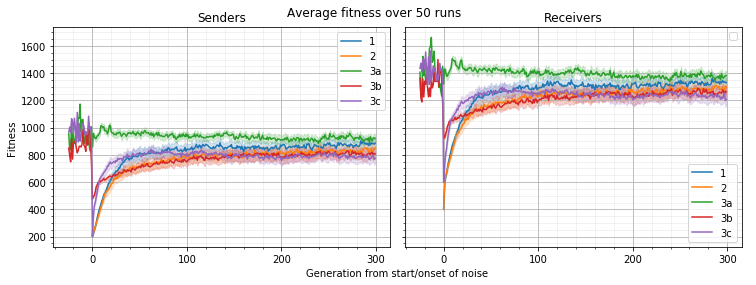

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `fitness.pdf'.


In [12]:
plt.set_cmap('Pastel1')

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10.5,4), sharex=True, sharey=True)
fig.patch.set_facecolor('white')


for i, (experiment, specy) in enumerate(zip(experiment_names, species)):
    if i >= 2:
        specy = specy.loc[idx[:,range(275,600)], :]
        specy = specy.reset_index()
        specy['generation'] -= 300
        specy = specy.set_index(['run','generation','species','role'])

    plt.sca(ax1)
    visualize.dataframe.plot_species_fitness(specy, species=0, role='sender', only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)
    plt.sca(ax2)
    visualize.dataframe.plot_species_fitness(specy, species=0, role='receiver', only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)

ax1.set_title('Senders')
ax1.set_xlabel('')
ax2.set_title('Receivers')
ax2.set_xlabel('')
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel('Generation from start/onset of noise')
fig.suptitle('Average fitness over 50 runs')

for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_minor_locator(MultipleLocator(50))
    ax.grid(which='major')
    ax.grid(which='minor', alpha=0.2)

plt.legend()
plt.savefig('fitness.svg')
plt.show()
!cairosvg fitness.svg -o fitness.pdf
!pdfcrop fitness.pdf fitness.pdf


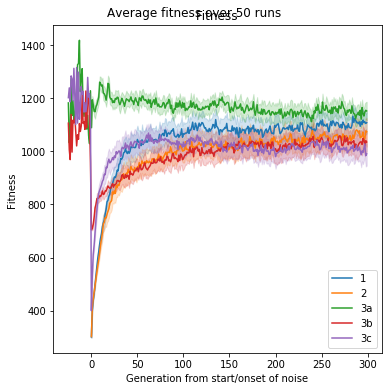

In [6]:
fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))

for i, (experiment, specy) in enumerate(zip(experiment_names, species)):
    if i >= 2:
        idx = pd.IndexSlice
        specy = specy.loc[idx[:,range(275,600)], :]
        specy = specy.reset_index()
        specy['generation'] -= 300
        specy = specy.set_index(['run','generation','species','role'])

    mean_role_fitness = specy.groupby(['role']).mean()['fitness']
    fitness = specy['fitness']
    fitness.div(mean_role_fitness, level='role')
    fitness = fitness.groupby(['run','generation','species']).mean()

    visualize.dataframe.plot_species_fitness(fitness, species=0, only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)

ax.set_xlabel('Generation from start/onset of noise')
# fig.add_subplot(111, frame_on=False)
fig.suptitle('Average fitness over 50 runs')

plt.legend()
plt.savefig('combined-fitness.svg')
plt.show()
# !cairosvg combined-fitness.svg -o combined-fitness.pdf
# !pdfcrop combined-fitness.pdf combined-fitness.pdf

## Fitness non-linearity function
NOT USED

In [7]:
# plt.rc('text', usetex=True)
# fig, ax = plt.subplots(1,1,figsize=(2.25,2.25))
# x = np.arange(0.0,1.0,0.01)
# y = (np.tanh(8.0 * (x - 0.5)) + 1.0) / 2.0
# data = pd.DataFrame(y, index=x)
# sns.lineplot(data=data, legend=False)
# plt.xlabel('$ 1 - abs( o_i - d_i ) $')
# plt.ylabel('score for bit $i$')
# plt.title(r'$\frac{1}{2} \left(\tanh(8.0 * (x - 0.5)) + 1\right)$')
#
# plt.tight_layout()
#
# filename = 'nonlin-fitness.svg'
# pdf_filename = 'nonlin-fitness.pdf'
# plt.savefig(filename)
# !cairosvg {filename} -o {pdf_filename}
# !pdfcrop {pdf_filename} {pdf_filename}

In [8]:
# plt.rc('text', usetex=True)
# fig, ax = plt.subplots(1,1,figsize=(2.25,2.25))
# x = range(4)
# y = [1.0, 1.0*1.1, 1.0*1.1*1.2, 1.0*1.1*1.2*1.3]
# data = pd.DataFrame({'n correct': x, 'multiplier': y})
# print(data)
# sns.barplot(x='n correct', y='multiplier', data=data)
# plt.xlabel('correct bits')
# plt.ylabel('total')
# plt.title('Multiplication Factors')
#
# plt.tight_layout()
#
# filename = 'multiplier.svg'
# pdf_filename = 'multiplier.pdf'
# # plt.show()
# plt.savefig(filename)
# !cairosvg {filename} -o {pdf_filename}
# !pdfcrop {pdf_filename} {pdf_filename}



## Run fitness by experiment violin plots
### Mean
This shows the average fitness for each of the 50 runs for each experiment.

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `violin.pdf'.


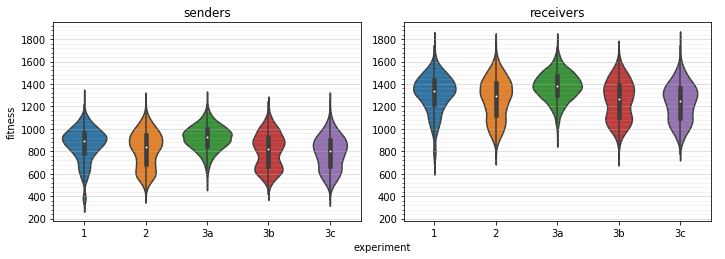

In [9]:
fig = plt.figure(figsize=(10.5,4))
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

axes = [fig.add_subplot(1, 2, 1)]
axes.append(fig.add_subplot(1, 2, 2, sharey=axes[0]))

fig.patch.set_facecolor('white')
# fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8.5,8.5), sharex=True, sharey=True)
# plt.sca(ax1)
# run_fitnesses = []
# for i, (name, specy) in enumerate(zip(experiment_names,species)):
#     r = range(250,300)
#     if i >=2 :
#         r = range(450,600)
#     run_fitness = specy.groupby(['run','generation']).mean().loc[idx[:,r],'fitness'].groupby(['run']).max().reset_index()
#     run_fitness['experiment'] = name
#     run_fitnesses.append(run_fitness)
#
# fitnesses = pd.concat(run_fitnesses)
#
# sns.violinplot(x='experiment', y='fitness', data=fitnesses)
#
# plt.sca(ax2)
run_fitnesses = []
for i, (name, specy) in enumerate(zip(experiment_names,species)):
    r = range(150,300)
    if i >=2 :
        r = range(450,600)
    gen_fitness = specy.groupby(['run','generation','role']).mean().loc[idx[:,r],'fitness'].reset_index()
    gen_fitness['experiment'] = name
    # gen_fitness.info()
    run_fitnesses.append(gen_fitness)
    # run_fitness = gen_fitness.groupby(['run','role']).mean().reset_index()
    # run_fitness['experiment'] = name
    # run_fitness.info()
    # run_fitnesses.append(run_fitness)

fitnesses = pd.concat(run_fitnesses)

for role, a in zip(['sender','receiver'], axes):
    plt.sca(a)
    a.set_title(role == 'sender' and 'senders' or 'receivers')
    data = fitnesses.loc[fitnesses['role'] == role]
    sns.violinplot(x='experiment', y='fitness', split=True, data=data)
    a.set_xlabel('')
    a.set_ylabel('')
    a.yaxis.set_minor_locator(MultipleLocator(40))
    a.yaxis.set_major_locator(MultipleLocator(200))
    a.grid(b=True, which='major', alpha=0.5, axis='y')
    a.grid(which='minor', alpha=0.2, axis='y')

axes[0].set_ylabel('fitness')
ax.set_xlabel('experiment')


plt.tight_layout()

# plt.show()
#
#
# fig, ax = plt.subplots(1,1,figsize=(10.5,5))
# fig.patch.set_facecolor('white')
# # minmax = fitnesses[['role','fitness']].groupby(['role']).aggregate(['min','max'])
# send_min, send_max = [200, 1200]
# recv_min, recv_max = [600, 1700]
#
# recv = fitnesses.loc[fitnesses['role'] == 'receiver']
# recv['fitness'] = recv['fitness'] * (send_max - send_min) / (recv_max - recv_min)
# fitnesses.loc[fitnesses['role'] == 'receivers'] = recv
#
# ax_senders = sns.violinplot(x='experiment', y='fitness', hue='role', hue_order=['sender','receiver'], split=True, data=fitnesses)
# ax_senders.set_ylim(send_min, send_max)
#
# ax_receivers = ax_senders.twinx()
# ax_receivers.set_ylim(recv_min, recv_max)
# sender_labels = ax_senders.yaxis.get_ticklabels()
# ax_receivers.yaxis.set_ticks(sender_labels)

#
# plt.sca(ax3)
# run_fitnesses = []
# for i, (name, specy) in enumerate(zip(experiment_names,species)):
#     r = range(250,300)
#     if i >=2 :
#         r = range(450,600)
#     run_fitness = specy.groupby(['run','generation']).mean().loc[idx[:,r],'fitness'].groupby(['run']).min().reset_index()
#     run_fitness['experiment'] = name
#     run_fitnesses.append(run_fitness)
#
# fitnesses = pd.concat(run_fitnesses)
#
# sns.violinplot(x='experiment', y='fitness', data=fitnesses)

# ax1.set_title('Max')
# ax2.set_title('Mean')
# ax3.set_title('Min')
# ax1.set_xlabel('')
# ax2.set_xlabel('')
# ax1.set_ylabel('')
# ax3.set_ylabel('')

filename = 'violin.svg'
pdf_filename = 'violin.pdf'
# plt.show()
plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}


## Animated Violin plots

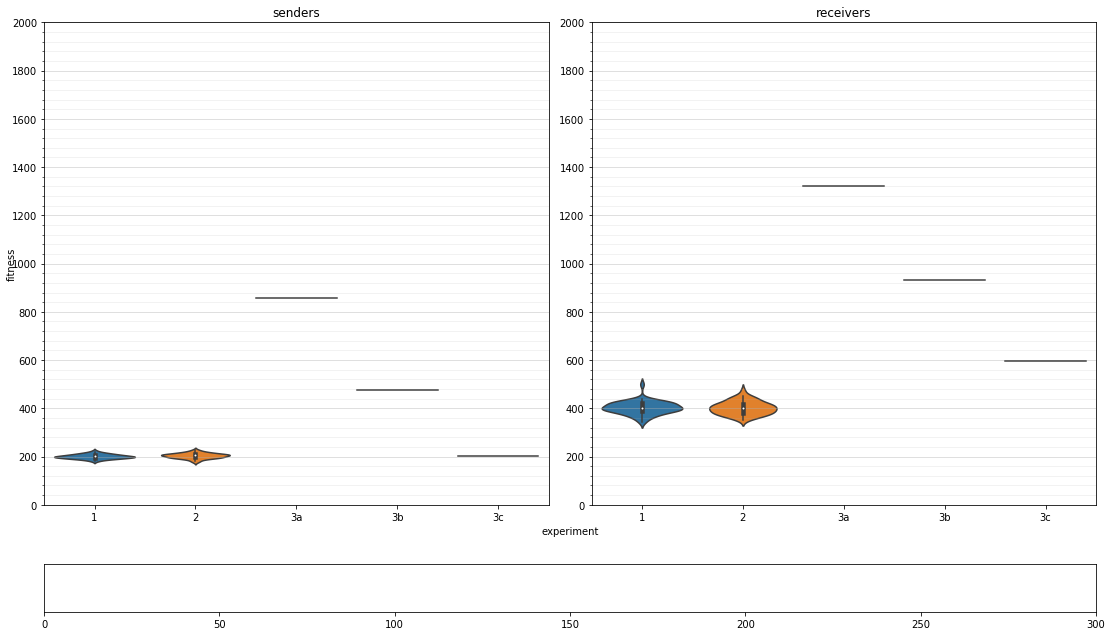

In [10]:
def plot_generation(idx, fit, axes):
    individuals_per_generation_role = 5*50

    for r, a in zip(['sender','receiver'], axes[:2]):
        plt.sca(a)
        a.clear()
        a.set_title(r == 'sender' and 'senders' or 'receivers')
        d = fit.loc[fit['role'] == r][idx:idx+individuals_per_generation_role]
        sns.violinplot(x='experiment', y='fitness', split=True, data=d)
        a.set_xlabel('')
        a.set_ylabel('')
        a.yaxis.set_minor_locator(MultipleLocator(40))
        a.yaxis.set_major_locator(MultipleLocator(200))
        a.set_ylim(0,2000)
        a.grid(b=True, which='major', alpha=0.5, axis='y')
        a.grid(which='minor', alpha=0.2, axis='y')

    progress = axes[2]

    progress.clear()
    progress.set_xlim(0,300)
    progress.barh(0, idx/float(individuals_per_generation_role), align='center')



# def init(fit, axes):
#     plot_generation(0, fit, axes)

def animate(i, fit, axes):
    # print('Animatiing frame {}'.format(i))
    plot_generation(i, fit, axes)

fig = plt.figure(figsize=(16,9))
gs = GridSpec(2,2, figure=fig, height_ratios=[10,1])
ax = fig.add_subplot(gs[0, :])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
axes = [fig.add_subplot(gs[0,0])]
axes.append(fig.add_subplot(gs[0, 1], sharey=axes[0]))
axes.append(fig.add_subplot(gs[1,:]))

fig.patch.set_facecolor('white')

run_fitnesses = []
for i, (name, specy) in enumerate(zip(experiment_names,species)):
    r = range(0,300)
    if i >=2 :
        r = range(300,600)
    gen_fitness = specy.groupby(['run','generation','role']).mean().loc[idx[:,r],'fitness'].reset_index()
    gen_fitness['experiment'] = name
    run_fitnesses.append(gen_fitness)

fitnesses = pd.concat(run_fitnesses)
fitnesses['generation'] = fitnesses['generation'] % 300
fitnesses.sort_values(by=['generation', 'run', 'experiment'], inplace=True)

plot_generation(0, fitnesses, axes)

ax.set_ylabel('fitness')
ax.set_xlabel('experiment')

axes[2].barh(0, 100, align='center')
axes[2].set_xlim(0,300)
axes[2].yaxis.set_visible(False)


plt.tight_layout()

######## Animation
count = 75000
skip = 5*5
Writer = animation.writers['ffmpeg']
writer = Writer(fps=90, metadata=dict(artist='David Kadish'))
ani = animation.FuncAnimation(fig, animate, frames=range(0,5000-250,skip), fargs=(fitnesses,axes),
                                   interval=1000/90, blit=False)
ani.save('violins.mp4', writer=writer)

plt.show()

## Difference in run fitness Ex 1 and 2
### AnovaRM
NOT USED

In [11]:
# fitness_by_run_generation_list = []
# for name, ind in zip(experiment_names,individuals):
#     fbrg = ind.groupby(['run','generation']).mean().drop(columns=['index','nodes','connections','max','min','std','subspecies']).reset_index()
#     fbrg['experiment'] = name
#     fitness_by_run_generation_list.append(fbrg)
#
# fitness_by_run_generation = pd.concat(fitness_by_run_generation_list)
#
# AnovaRM(fitness_by_run_generation, 'fitness', 'run', within=['experiment'])